In [1]:
import pandas as pd
import numpy as np
import sys
import glob

import warnings
warnings.filterwarnings('ignore')
sys.path.append("../modules")
sys.path.append("../Datat/koskemattomat_csv")
sys.path.append("../Datat/csv")

from datacleaner import dataCleaner
all_csv = glob.glob("../../Datat/koskemattomat_csv/*.csv")

# Luodaan kaikista datoista siivottu dataframe ja lisätään ne listaan.
dataframes = []
names = []
for f in all_csv:
    df_name= str(f'{f.split("/")[-1:]}').rstrip("]").lstrip("[")
    df_name = df_name.split(".")[-2].lstrip("'")
    print(df_name)
    names.append(df_name)
    dataframes.append(dataCleaner(pd.read_csv(f), False, False, False, False))
    
copy = dataframes.copy()



IV_TE3A_Menovesi_LaskAs
----------------------
Processing DataFrame:
----------------------

Cleaning timestamp...
Creating value_difference column (abs=False)

done in 4.56 seconds
LJK_IV_TE3A_Meno_M
----------------------
Processing DataFrame:
----------------------

Cleaning timestamp...
Creating value_difference column (abs=False)

done in 37.01 seconds
UlkoLampotila
----------------------
Processing DataFrame:
----------------------

Cleaning timestamp...
Creating value_difference column (abs=False)

done in 9.32 seconds
TK1_TV1_1_Lammitys_S
----------------------
Processing DataFrame:
----------------------

Cleaning timestamp...
Creating value_difference column (abs=False)

done in 25.24 seconds
TK1_LTO_S
----------------------
Processing DataFrame:
----------------------

Cleaning timestamp...
Creating value_difference column (abs=False)

done in 18.26 seconds
TK1_TE1_3_Tulo_M
----------------------
Processing DataFrame:
----------------------

Cleaning timestamp...
Creating va

In [3]:
# Voidaan tehdä myös aijemman loopin yhteydessä.

# Muutetaan dataframen kaikille muille sarakkeille identifioiva nimi, paitsi timestampille. Timestampilla dataframet saadaan yhdistettyä.
for (df, name) in zip(dataframes, names):
    df.rename(columns={col:f"{col}_{''.join(name.split('_')[-2:])}" for col in df.columns[1:]}, inplace=True)
df


,timestamp,trendFlags_1LaskAs_1LaskAs,status_1LaskAs_1LaskAs,value_1LaskAs_1LaskAs,value_difference_1LaskAs_1LaskAs
0,2019-04-03 08:51:00,{start},{ok},140.0,NaN
1,2019-04-03 17:00:00,{ },{ok},70.0,-70.0
2,2019-04-04 06:00:00,{ },{ok},140.0,70.0
3,2019-04-04 17:00:00,{ },{ok},70.0,-70.0
4,2019-04-05 06:00:00,{ },{ok},140.0,70.0
...,...,...,...,...,...
1378,2021-02-13 06:00:00,{ },{ok},140.0,70.0
1379,2021-02-13 17:00:00,{ },{ok},70.0,-70.0
1380,2021-02-14 06:00:00,{ },{ok},140.0,70.0
1381,2021-02-14 17:00:00,{ },{ok},70.0,-70.0


In [ ]:
# Yhdistetään kaikki dataframet timestampin avulla. merge_ordered yhdistää dataframet siten, että jokainen timestamp kaikista dataframeista otetaan mukaan (Lisää treenidataa!!), 
# ja täyttää kaikki puuttuvat arvot väleistä viimeisimmän arvon mukaan. 
copy = dataframes.copy()

comp = copy.pop()
for df in copy:
    df.sort_values(by="timestamp")
    comp = pd.merge_ordered(left=comp, right=df, on="timestamp", fill_method="ffill")
comp

In [12]:
# Datasta löytyy paljon nan-arvoja. 
comp.isna().sum()

timestamp                                   0
trendFlags_1LaskAs                          0
status_1LaskAs                              0
value_1LaskAs                               0
value_difference_1LaskAs                   49
trendFlags_MenovesiLaskAs                   0
status_MenovesiLaskAs                       0
value_MenovesiLaskAs                        0
value_difference_MenovesiLaskAs             1
trendFlags_MenoM                       231873
status_MenoM                           231873
value_MenoM                            231873
value_difference_MenoM                 231874
trendFlags_UlkoLampotila                    0
status_UlkoLampotila                        0
value_UlkoLampotila                         0
value_difference_UlkoLampotila              1
trendFlags_LammitysS                   109169
status_LammitysS                       109169
value_LammitysS                        109169
value_difference_LammitysS             109170
trendFlags_LTOS                   

In [13]:
# Poistetaan kaikki nan-arvot ja duplikaatit
test = comp.copy() 
test = test.dropna()
# test = test.drop_duplicates()

In [14]:
test

,timestamp,trendFlags_1LaskAs,status_1LaskAs,value_1LaskAs,value_difference_1LaskAs,trendFlags_MenovesiLaskAs,status_MenovesiLaskAs,value_MenovesiLaskAs,value_difference_MenovesiLaskAs,trendFlags_MenoM,...,value_TuloilmaLaskettuAs,value_difference_TuloilmaLaskettuAs,trendFlags_PoistoM,status_PoistoM,value_PoistoM,value_difference_PoistoM,trendFlags_PatterinPaluuvesiM,status_PatterinPaluuvesiM,value_PatterinPaluuvesiM,value_difference_PatterinPaluuvesiM
231874,2020-05-18 20:30:00,{ },{ok},70.0,-70.0,{ },{ok},28.65,0.53,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},22.22,-0.54
231875,2020-05-18 20:30:00,{ },{ok},70.0,-70.0,{ },{ok},28.65,0.53,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},22.22,-0.54
231876,2020-05-18 20:31:00,{ },{ok},70.0,-70.0,{ },{ok},28.65,0.53,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},22.22,-0.54
231877,2020-05-18 20:31:00,{ },{ok},70.0,-70.0,{ },{ok},28.65,0.53,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},22.22,-0.54
231878,2020-05-18 20:31:00,{ },{ok},70.0,-70.0,{ },{ok},28.65,0.53,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},22.22,-0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166622,2021-02-15 11:20:00,{ },{ok},140.0,70.0,{ },{ok},53.44,0.55,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},24.47,-0.58
1166623,2021-02-15 11:20:00,{ },{ok},140.0,70.0,{ },{ok},53.44,0.55,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},24.47,-0.58
1166624,2021-02-15 11:21:00,{ },{ok},140.0,70.0,{ },{ok},53.44,0.55,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},24.47,-0.58
1166625,2021-02-15 11:21:00,{ },{ok},140.0,70.0,{ },{ok},53.44,0.55,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},24.47,-0.58


In [15]:
# Huomataan, että rivejä poistui aika reilusti.
print(f"rivejä poistettu: {len(comp)-len(test)}\n")

# Timestamp näyttää, että aloituspäivä on vasta 18.5.2020, vaikka dataa on jo vuodelta 2019.

# Tutkitaanpa jokaisen dataframen aloituspäiviä
for (df, name) in zip(dataframes, names):
    print(f"{name:<40}{df['timestamp'][0]}")
    print(f"{name:<40}{df['timestamp'][len(df)-1]}\n")  
    
# LJK_IV_TE3A_Meno_M dataa on vasta alettu keraamaan juurikin tuolta 18.5.2020 lahtien..
# Jos vilkaistaan ylempää, niin tuossa datassa on ollut tuo testidatan verran poistettuja rivejä..

# Näyttää siis silt, että merge on onnistunut hienosti.
# Täytyy tosin vielä yrittää tarkastaa, onko dataframen keskiosilla tilanteita, joissa jossakin dataframessa on ollut luonnottoman pitkä tauko datan keruun suhteen.
# Tämä nimittäin voisi tarkoittaa sitä, että pitkään samana pysynyt arvo vääristää muiden datasettien sinä hetkenä keräämiä arvoja. 
# Tästä ei vielä ole kyllä oikein mitään ideaa, että mitenkä tätä kannattaisi lähteä todentamaan. Ehkä Juho-Lauri osaa sanoa, voidaanko luottaa, että näin tehty merge on luotettava?


# Toki meidän tulee vielä poistaa ne rivit datasta, jolloin tiedetään, että kone on ollut sammuksissa. Eli TK1_TF1_PE1_1_LaskAs value == 0.
# Pitää myös poistaa ne rivit, jolloin lämmitys ei ole ollut päällä. Eli LTO < 100.
# Poistetaan myös rivit, joissa status = fault tai down. Ne override rivit pidetään, jotka kuuluvat IV_TE3A_Menovesi_LaskAs statukseen. 
# Muiden statuksien sisältävät override rivit poistetaan dataframesta.



rivejä poistettu: 231874

IV_TE3A_Menovesi_LaskAs                 2019-04-03 08:51:00
IV_TE3A_Menovesi_LaskAs                 2021-02-15 10:33:00

LJK_IV_TE3A_Meno_M                      2020-05-18 20:30:00
LJK_IV_TE3A_Meno_M                      2021-02-15 11:21:00

UlkoLampotila                           2019-04-03 08:51:00
UlkoLampotila                           2021-02-15 10:31:00

TK1_TV1_1_Lammitys_S                    2020-01-23 21:28:00
TK1_TV1_1_Lammitys_S                    2021-02-15 10:35:00

TK1_LTO_S                               2019-05-16 15:16:00
TK1_LTO_S                               2021-02-15 09:01:00

TK1_TE1_3_Tulo_M                        2019-12-17 10:06:00
TK1_TE1_3_Tulo_M                        2021-02-15 10:25:00

TK1_TE1_3_Tuloilma_LaskettuAs           2019-04-03 08:51:00
TK1_TE1_3_Tuloilma_LaskettuAs           2021-02-15 09:38:00

TK1_TE1_4_Poisto_M                      2019-04-03 08:51:00
TK1_TE1_4_Poisto_M                      2021-02-15 00:52:00

TK1_TE

In [16]:
# Kaikki data, jolloin kone on ollut sammuksissa tulee poistaa. 
#Pitää vielä varmistaa jokainen dataframe yksitellen, että enempää riviä ei toisiaankaan ole. 
# Jos tämä tulos pitää paikkaansa, voidaan aika varmasti luottaa, että merge on tosiaankin mennyt oikein.

print(test[test["value_1LaskAs"]==0]["timestamp"])
mask = (test['timestamp'] >= '2020-11-21 10:46:00') & (test['timestamp'] <= '2020-11-21 10:48:00')
test.loc[mask]

718813   2020-11-21 10:46:00
718814   2020-11-21 10:46:00
718815   2020-11-21 10:46:00
718816   2020-11-21 10:46:00
718817   2020-11-21 10:47:00
Name: timestamp, dtype: datetime64[ns]


,timestamp,trendFlags_1LaskAs,status_1LaskAs,value_1LaskAs,value_difference_1LaskAs,trendFlags_MenovesiLaskAs,status_MenovesiLaskAs,value_MenovesiLaskAs,value_difference_MenovesiLaskAs,trendFlags_MenoM,...,value_TuloilmaLaskettuAs,value_difference_TuloilmaLaskettuAs,trendFlags_PoistoM,status_PoistoM,value_PoistoM,value_difference_PoistoM,trendFlags_PatterinPaluuvesiM,status_PatterinPaluuvesiM,value_PatterinPaluuvesiM,value_difference_PatterinPaluuvesiM
718813,2020-11-21 10:46:00,{ },{ok},0.0,-140.0,{ },{ok},43.13,-0.52,{ },...,33.0,10.0,{ },{ok},13.06,-0.51,{ },{ok},42.30,0.57
718814,2020-11-21 10:46:00,{ },{ok},0.0,-140.0,{ },{ok},43.13,-0.52,{ },...,33.0,10.0,{ },{ok},13.06,-0.51,{ },{ok},42.30,0.57
718815,2020-11-21 10:46:00,{ },{ok},0.0,-140.0,{ },{ok},43.13,-0.52,{ },...,33.0,10.0,{ },{ok},13.06,-0.51,{ },{ok},42.30,0.57
718816,2020-11-21 10:46:00,{ },{ok},0.0,-140.0,{ },{ok},43.13,-0.52,{ },...,33.0,10.0,{ },{ok},13.06,-0.51,{ },{ok},42.30,0.57
718817,2020-11-21 10:47:00,{ },{ok},0.0,-140.0,{ },{ok},43.13,-0.52,{ },...,23.0,-10.0,{ },{ok},13.06,-0.51,{ },{ok},42.30,0.57
718818,2020-11-21 10:48:00,{ },{ok},140.0,140.0,{ },{ok},43.13,-0.52,{ },...,23.0,-10.0,{ },{ok},13.06,-0.51,{ },{ok},41.78,-0.52


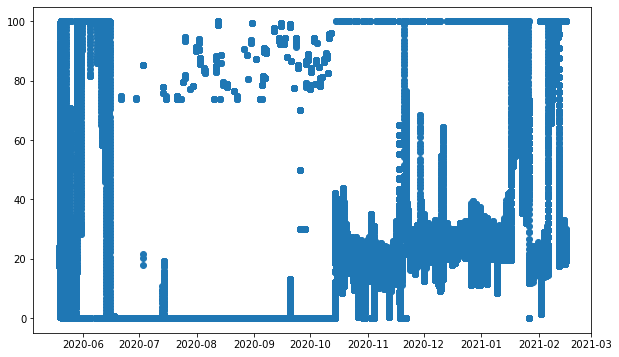

934753

In [17]:

import matplotlib.pyplot as plt

#merge_1
plt.figure(figsize=(10,6))
import matplotlib.pyplot as plt
x = test["timestamp"]
y = test["value_LammitysS"]

plt.scatter(x=x,y=y)
plt.show()
len(y)

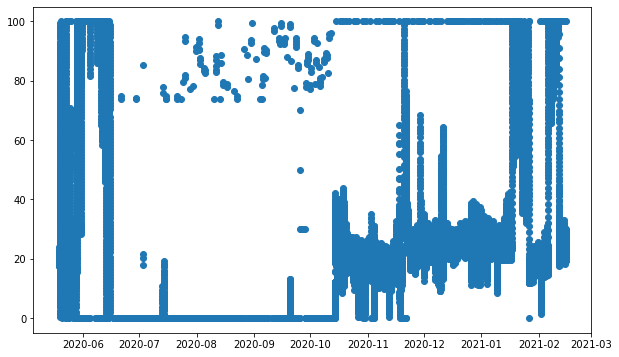

33413

In [18]:
#original
plt.figure(figsize=(10,6))

x=dataframes[3]["timestamp"]
y=dataframes[3]["value_LammitysS"]

data = pd.merge(x,y, left_index=True, right_index=True)
data = data[data["timestamp"] >= "2020-05-18 20:30:00"]
plt.scatter(x=data["timestamp"],y=data["value_LammitysS"])
plt.show()
len(data)

In [ ]:
# Merge_asof työstetään loppuun, jos huomataan, että merge_ordered ei ole tehnyt yhdistämistä oikein..

In [6]:
# Testataan Myös, kuinka mergeäminen onnistuu merge_asof -metodilla.
copy1 = dataframes.copy()
# for df in copy:
#     print(len(df))
copy1 = sorted(copy ,key=len, reverse=True)
# for df in copy:
#     print(len(df))

comp1 = copy1.pop(0)
for df in copy1:
    comp1 = comp1.sort_values(by="timestamp")
    df = df.sort_values(by="timestamp")
    comp1 = pd.merge_asof(left=comp1, right=df, left_on=['timestamp'], right_on=['timestamp'])
comp1

,timestamp,trendFlags_MenoM_MenoM,status_MenoM_MenoM,value_MenoM_MenoM,value_difference_MenoM_MenoM,trendFlags_LTOS_LTOS,status_LTOS_LTOS,value_LTOS_LTOS,value_difference_LTOS_LTOS,trendFlags_PatterinPaluuvesiM_PatterinPaluuvesiM,...,value_TuloilmaLaskettuAs_TuloilmaLaskettuAs,value_difference_TuloilmaLaskettuAs_TuloilmaLaskettuAs,trendFlags_PoistoM_PoistoM,status_PoistoM_PoistoM,value_PoistoM_PoistoM,value_difference_PoistoM_PoistoM,trendFlags_1LaskAs_1LaskAs,status_1LaskAs_1LaskAs,value_1LaskAs_1LaskAs,value_difference_1LaskAs_1LaskAs
0,2020-05-18 20:30:00,{ },{ok},28.73,NaN,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
1,2020-05-18 20:30:00,{ },{ok},29.31,0.58,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
2,2020-05-18 20:30:00,{ },{ok},28.80,-0.51,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
3,2020-05-18 20:31:00,{ },{ok},28.21,-0.59,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
4,2020-05-18 20:31:00,{ },{ok},27.52,-0.69,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417269,2021-02-15 11:20:00,{ },{ok},52.44,-1.13,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417270,2021-02-15 11:20:00,{ },{ok},53.98,1.02,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417271,2021-02-15 11:21:00,{ },{ok},53.98,-0.54,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417272,2021-02-15 11:21:00,{ },{ok},54.52,0.54,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0


In [7]:
test1 = comp1.copy() 
test1 = test1.dropna()
test1 = test1.drop_duplicates()

# test1 = test1[test1["value_LTOS"] == 100]

In [8]:
test1

,timestamp,trendFlags_MenoM_MenoM,status_MenoM_MenoM,value_MenoM_MenoM,value_difference_MenoM_MenoM,trendFlags_LTOS_LTOS,status_LTOS_LTOS,value_LTOS_LTOS,value_difference_LTOS_LTOS,trendFlags_PatterinPaluuvesiM_PatterinPaluuvesiM,...,value_TuloilmaLaskettuAs_TuloilmaLaskettuAs,value_difference_TuloilmaLaskettuAs_TuloilmaLaskettuAs,trendFlags_PoistoM_PoistoM,status_PoistoM_PoistoM,value_PoistoM_PoistoM,value_difference_PoistoM_PoistoM,trendFlags_1LaskAs_1LaskAs,status_1LaskAs_1LaskAs,value_1LaskAs_1LaskAs,value_difference_1LaskAs_1LaskAs
1,2020-05-18 20:30:00,{ },{ok},29.31,0.58,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
2,2020-05-18 20:30:00,{ },{ok},28.80,-0.51,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
3,2020-05-18 20:31:00,{ },{ok},28.21,-0.59,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
4,2020-05-18 20:31:00,{ },{ok},27.52,-0.69,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
5,2020-05-18 20:31:00,{ },{ok},28.33,0.81,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417269,2021-02-15 11:20:00,{ },{ok},52.44,-1.13,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417270,2021-02-15 11:20:00,{ },{ok},53.98,1.02,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417271,2021-02-15 11:21:00,{ },{ok},53.98,-0.54,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417272,2021-02-15 11:21:00,{ },{ok},54.52,0.54,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0


In [10]:
# print(test1[test1["value_1LaskAs"]==0]["timestamp"])
# mask = (test1['timestamp'] >= '2020-11-21 10:46:00') & (test1['timestamp'] <= '2020-11-21 10:48:00')
# test1.loc[mask]

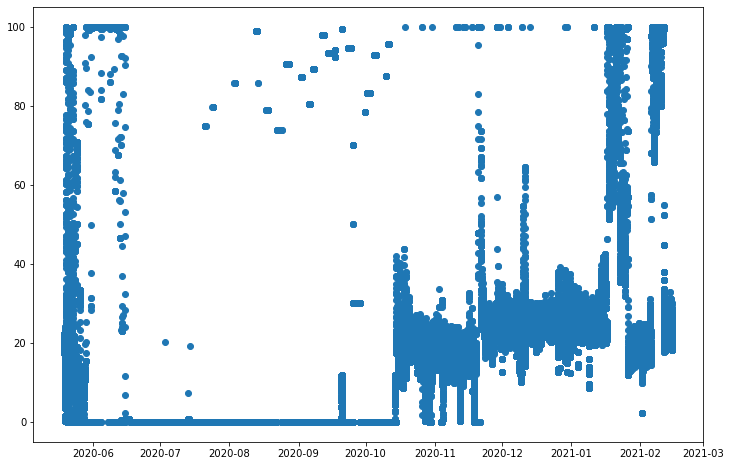

417093

In [14]:
#merge2
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
x = test1["timestamp"]
y = test1["value_LammitysS_LammitysS"]

plt.scatter(x=x,y=y)
plt.show()
len(y)

In [15]:
test1

,timestamp,trendFlags_MenoM_MenoM,status_MenoM_MenoM,value_MenoM_MenoM,value_difference_MenoM_MenoM,trendFlags_LTOS_LTOS,status_LTOS_LTOS,value_LTOS_LTOS,value_difference_LTOS_LTOS,trendFlags_PatterinPaluuvesiM_PatterinPaluuvesiM,...,value_TuloilmaLaskettuAs_TuloilmaLaskettuAs,value_difference_TuloilmaLaskettuAs_TuloilmaLaskettuAs,trendFlags_PoistoM_PoistoM,status_PoistoM_PoistoM,value_PoistoM_PoistoM,value_difference_PoistoM_PoistoM,trendFlags_1LaskAs_1LaskAs,status_1LaskAs_1LaskAs,value_1LaskAs_1LaskAs,value_difference_1LaskAs_1LaskAs
1,2020-05-18 20:30:00,{ },{ok},29.31,0.58,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
2,2020-05-18 20:30:00,{ },{ok},28.80,-0.51,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
3,2020-05-18 20:31:00,{ },{ok},28.21,-0.59,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
4,2020-05-18 20:31:00,{ },{ok},27.52,-0.69,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
5,2020-05-18 20:31:00,{ },{ok},28.33,0.81,{ },{ok},100.0,0.0,{ },...,20.64,-0.52,{ },{ok},21.65,0.53,{ },{ok},70.0,-70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417269,2021-02-15 11:20:00,{ },{ok},52.44,-1.13,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417270,2021-02-15 11:20:00,{ },{ok},53.98,1.02,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417271,2021-02-15 11:21:00,{ },{ok},53.98,-0.54,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
417272,2021-02-15 11:21:00,{ },{ok},54.52,0.54,{ },{ok},100.0,0.0,{ },...,19.85,-0.56,{ },{ok},21.74,0.00,{ },{ok},140.0,70.0
